<a href="https://colab.research.google.com/github/yuanheng0704/testAI/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

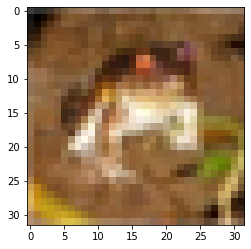

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
x_train = x_train / 255
x_test = x_test / 255


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 3s 79us/step - loss: 1.6623 - acc: 0.3984 - val_loss: 1.4372 - val_acc: 0.4806
Epoch 2/10
35000/35000 [==============================] - 2s 61us/step - loss: 1.3236 - acc: 0.5240 - val_loss: 1.2532 - val_acc: 0.5550
Epoch 3/10
35000/35000 [==============================] - 2s 60us/step - loss: 1.1579 - acc: 0.5914 - val_loss: 1.1472 - val_acc: 0.5927
Epoch 4/10
35000/35000 [==============================] - 2s 60us/step - loss: 1.0453 - acc: 0.6321 - val_loss: 1.1527 - val_acc: 0.5955
Epoch 5/10
35000/35000 [==============================] - 2s 60us/step - loss: 0.9509 - acc: 0.6670 - val_loss: 1.0474 - val_acc: 0.6341
Epoch 6/10
35000/35000 [==============================] - 2s 60us/step - loss: 0.8814 - acc: 0.6923 - val_loss: 0.9813 - val_acc: 0.6593
Epoch 7/10
35000/35000 [==============================] - 2s 60us/step - loss: 0.7934 - acc: 0.7217 - val_loss: 0.9626 - val_acc

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 1s 67us/step


0.6668

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')  


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt


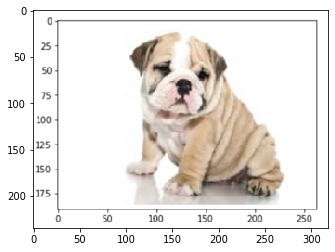

In [ ]:
my_image = plt.imread("image/DOG.png")
img = plt.imshow(my_image)

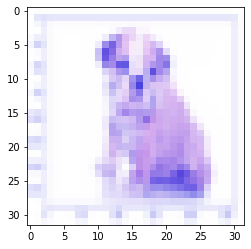

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) 
img = plt.imshow(my_image_resized) 



In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities



array([[5.66100001e-01, 1.36140952e-04, 1.12853706e-01, 1.76349562e-02,
        1.05557069e-02, 4.96595651e-02, 2.93452933e-04, 1.13783106e-02,
        2.29799613e-01, 1.58849731e-03]], dtype=float32)

In [ ]:
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])


Most likely class: airplane -- Probability: 0.5661


In [ ]:
model.save('my_model.h5')
from keras.models import load_model
model = load_model('my_model.h5')


In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
model.add(Dropout(0.25))
